# Email Spam Classifier <br>
<h3>Abstract</h3><br>
A basic NLP classification task to classify between spam and ham on a given SMS spam dataset of 5,574 messages. <br>

- The Email Spam Collection is a set of Email tagged messages that have been collected for email Spam research. It contains one set of Email messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [80]:
## Importing the essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

## Importing the data csv file and Data preprocessing

In [81]:
emails = pd.read_csv('emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [82]:
print (f"There are {emails.shape[0]} rows and {emails.shape[1]} columns.")

There are 5728 rows and 2 columns.


In [83]:
# Calculating the length of each emails/ rows and storing it on the new feature 'length'
emails['length'] = emails['text'].apply(len)
emails.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [84]:
# Removing punctuation
import string 
import nltk.corpus

In [85]:
def remove_punct_stopwords(message):
    form_str = [char for char in message if char not in string.punctuation]
    form_str_join = ''.join(form_str)
    # including subject also in the stopwords list
    words_stop = nltk.corpus.stopwords.words('english')
    words_stop.append('subject')
    form_str_stop = [word for word in form_str_join.split() if word.lower() not in words_stop]
    return form_str_stop

## Exploratory Data Analysis

In [86]:
emails['length'].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [87]:
ham_percent = (emails['spam'].value_counts()/emails.shape[0]*100)[0]
print (f'In the dataset, {ham_percent:.2f}% of the emails are ham, while the rest {(100 - ham_percent):.2f}% of the emails are labelled as spam.')

In the dataset, 76.12% of the emails are ham, while the rest 23.88% of the emails are labelled as spam.


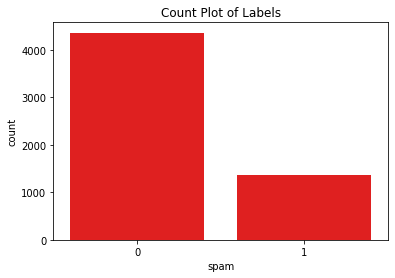

In [88]:
plt.title('Count Plot of Labels')
sns.countplot(emails['spam'], color='r');

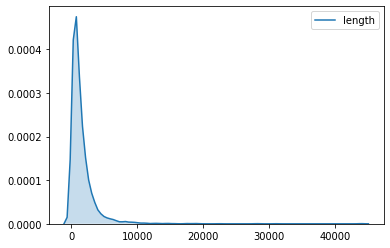

In [89]:
# Exploring the 'length' feature
sns.kdeplot(emails['length'], shade=True);

In [90]:
# Dividing it into 'spam' and 'ham'
spam = emails[emails['spam']==1]
ham = emails[emails['spam']==0]

In [91]:
spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [92]:
ham.head()

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535


In [93]:
# Exploring the spam dataset
spam['length'].describe()

count     1368.000000
mean      1317.257310
std       2271.372893
min         18.000000
25%        401.500000
50%        693.500000
75%       1250.250000
max      28432.000000
Name: length, dtype: float64

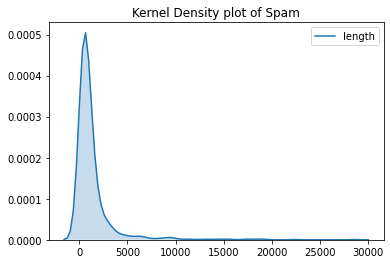

In [94]:
plt.title('Kernel Density plot of Spam')
sns.kdeplot(spam['length'],shade=True);

In [95]:
# Getting the spam email with the largest length
print (spam[spam['length']==max(spam['length'])].text.iloc[0])

y 30 , 1 had received 196 orders for report # 2 ; 46 more  than i needed . so i sat back and relaxed . by march 1 , of my  e - mailing of 10 , 000 , i received $ 58 , 000 with more coming in every  day . i paid off all my debts and bought a much needed new car .  please take time to read the attached program , it will change your  life forever ! ! remember , it won ' t work if you don ' t try it . this  program does work , but you must follow it exactly ! especially the  rules of not trying to place your name in a different place . it  won ' t work , you ' ll lose out on a lot of money !  in order for this program to work very fast , try to meet your goal  of 20 + orders for report # 1 , and 150 + orders for report # 2 and you  will make $ 50 , 000 or more in 90 days . if you don ' t reach the first  two goals with in four weeks , relax , you will still make a ton of  money , it may take a few months or so longer . but keep mailing out  the programs and stay focused ! that ' s the key 

In [96]:
# Exploring the ham dataset
ham['length'].describe()

count     4360.000000
mean      1631.918119
std       1959.664549
min         13.000000
25%        577.750000
50%       1122.000000
75%       2037.250000
max      43952.000000
Name: length, dtype: float64

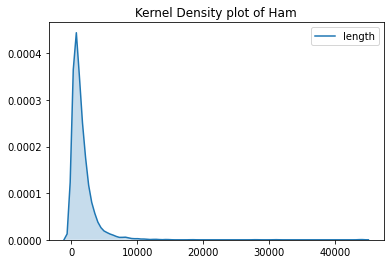

In [97]:
plt.title('Kernel Density plot of Ham')
sns.kdeplot(ham['length'],shade=True);

In [98]:
# Getting the ham email with the largest length
print (ham[ham['length']==max(ham['length'])].text.iloc[0])

rmination notice , the parties shall consult for a period of six months ( or such longer period as they may agree ) as to what step shall be taken with a view to mitigating the consequences of the relevant event having regard to all the circumstances . . . ' '  idbi and state bank of india , the principal indian lenders , had earlier persuaded the overseas lenders to hold their consent to the termination notice for some more time . at least one lender has to consent for the company to serve termination notice . it is understood that overseas lenders are in favour of termination of the project and are prepared to consent . however , domestic lenders are worried about the security of their advances if the ppa is abandoned mid - way .  according to institutional sources , indian lenders are trying to get all the parties concerned to thrash out outstanding issues . the maharashtra and central governments too are in favour of a conciliation . mr vilasrao deshmukh , chief minister of maharas

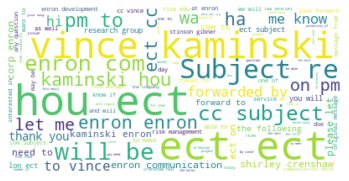

In [99]:
from wordcloud import WordCloud, STOPWORDS
# Creating the wordcloud 
stopwords = set(STOPWORDS)
stopwords.update('Subject','ect')
text = " ".join(text for text in emails.text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
# Using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=remove_punct_stopwords)

In [101]:
from sklearn.model_selection import train_test_split
# Applying the count_vectorizer pipeline to features
X = vectorizer.fit_transform(emails.text)
y = emails.spam.values 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y) 

In [102]:
X.shape

(5728, 37227)

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# Initialising the naive bayes models
classifiers = [GaussianNB(),BernoulliNB(),MultinomialNB()]
for cls in classifiers:
    cls.fit(X_train.toarray(),y_train)

In [104]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

cm = []
model_name = []
fpr_tpr = []
model_auc_list = []
data = []
def class_report(y,y_pred,ml_model,dataset):
    data.append(dataset)
    model_name.append(ml_model)
    cm.append(confusion_matrix(y,y_pred))
    

    fpr, tpr, thresholds = roc_curve(y, y_pred)
    fpr_tpr.append([fpr,tpr])
    
    model_auc = auc(fpr, tpr)
    model_auc_list.append(model_auc)
     # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
  

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [106]:
# Plotting the Confusion of test data set
fig, ax = plt.subplots(len(cm))
for i in range(1,len(cm)):
    plt.title(f'{model_name[i-1]} Confusion Matrix of {data[i-1]} Dataset')
    sns.heatmap(cm[i-1], cmap='plasma', annot=True, square=True, fmt='d',
           xticklabels=['Ham', 'Spam'],
           yticklabels=['Ham', 'Spam'])
    plt.show()

<Figure size 432x288 with 0 Axes>

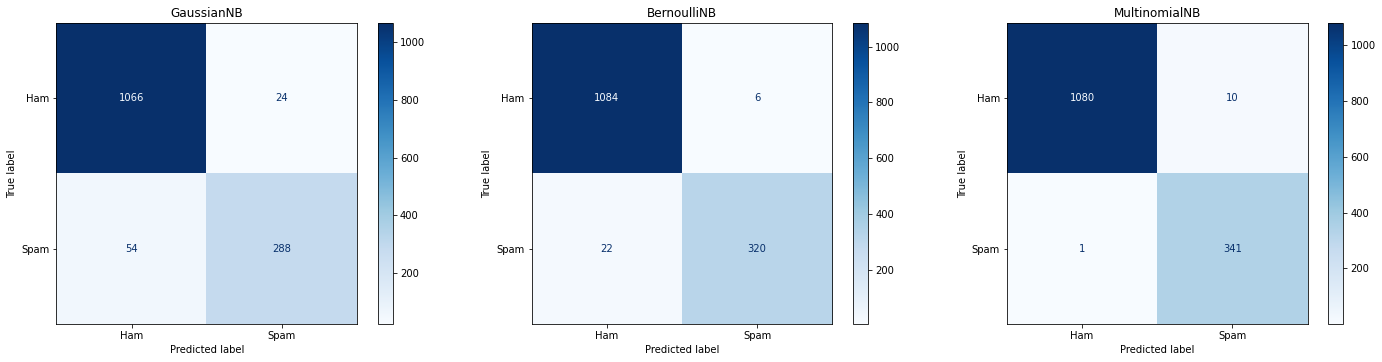

In [107]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test.toarray(), 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Ham','Spam'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

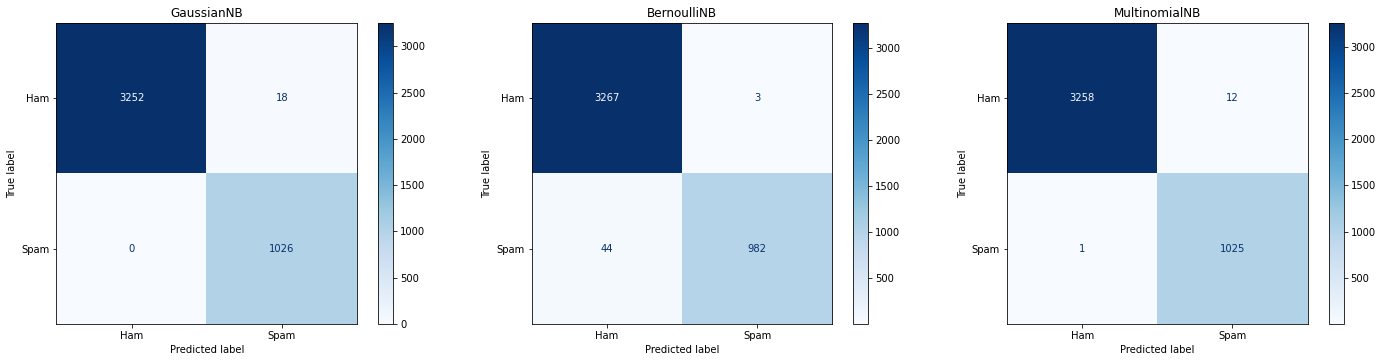

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_train.toarray(), 
                          y_train, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Ham','Spam'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [109]:
fpr, tpr, model_auc = [],[],[]
def fpr_tpr(X,y):
    for i in range(3):
        y_pred = classifiers[i].predict(X)
        t_fpr, t_tpr, thresholds = roc_curve(y, y_pred)
        fpr.append(t_fpr)
        tpr.append(t_tpr)
        model_auc.append(auc(fpr1, tpr1))


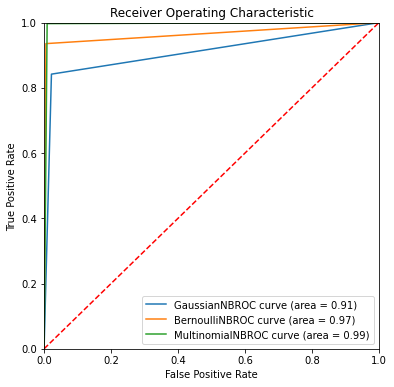

In [110]:
fpr_tpr(X_test.toarray(), y_test)
# plot the ROC curve
plt.figure(figsize = [6,6])
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], label=f'{type(classifiers[i]).__name__}ROC curve (area = {model_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()